In [937]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [938]:
# Read the CSV file into a DataFrame
df = pd.read_csv("c:/Users/six\Desktop\Moringa\pHASE_5\KilimoRiziki-Decision-Hub\wfp_food_prices_ken.csv")
df.head(30)

,date,admin1,admin2,market,longitude,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lon,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,15/01/2012,Coast,Mombasa,Mombasa,39.666667,Maize,90 KG,actual,Wholesale,KES,3020,35.5983
2,15/01/2012,Coast,Mombasa,Mombasa,39.666667,Potatoes,50 KG,actual,Wholesale,KES,2180,25.6968
3,15/01/2012,Coast,Mombasa,Mombasa,39.666667,Beans,KG,actual,Wholesale,KES,62.49,0.7366
4,15/01/2012,Coast,Mombasa,Mombasa,39.666667,Beans,90 KG,actual,Wholesale,KES,5470,64.4777
5,15/01/2012,Eastern,Kitui,Kitui,38.016667,Maize,KG,actual,Retail,KES,42,0.4951
6,15/01/2012,Eastern,Kitui,Kitui,38.016667,Potatoes,50 KG,actual,Wholesale,KES,1888.88,22.2652
7,15/01/2012,Eastern,Kitui,Kitui,38.016667,Beans,KG,actual,Retail,KES,72,0.8487
8,15/01/2012,Eastern,Marsabit,Marsabit,37.983333,Maize,KG,actual,Retail,KES,50.9,0.6
9,15/01/2012,Nairobi,Nairobi,Nairobi,36.816667,Maize,KG,actual,Wholesale,KES,34.49,0.4066


In [939]:
# Select specific rows based on item names
selected_items = ['Maize', 'Beans', 'Potatoes','Bananas']
filtered_df = df[df['commodity'].isin(selected_items)]
filtered_df.head(3000)

,date,admin1,admin2,market,longitude,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,15/01/2012,Coast,Mombasa,Mombasa,39.666667,Maize,90 KG,actual,Wholesale,KES,3020,35.5983
2,15/01/2012,Coast,Mombasa,Mombasa,39.666667,Potatoes,50 KG,actual,Wholesale,KES,2180,25.6968
3,15/01/2012,Coast,Mombasa,Mombasa,39.666667,Beans,KG,actual,Wholesale,KES,62.49,0.7366
4,15/01/2012,Coast,Mombasa,Mombasa,39.666667,Beans,90 KG,actual,Wholesale,KES,5470,64.4777
5,15/01/2012,Eastern,Kitui,Kitui,38.016667,Maize,KG,actual,Retail,KES,42,0.4951
...,...,...,...,...,...,...,...,...,...,...,...,...
3871,15/02/2020,Rift Valley,Kajiado,Kajiado,36.7913,Beans,KG,actual,Retail,KES,93,0.9227
3872,15/02/2020,Rift Valley,Nakuru,Nakuru,36.0744,Maize,KG,actual,Wholesale,KES,31.02,0.3078
3873,15/02/2020,Rift Valley,Nakuru,Nakuru,36.0744,Maize,90 KG,actual,Wholesale,KES,2800,27.7804
3874,15/02/2020,Rift Valley,Nakuru,Nakuru,36.0744,Potatoes,50 KG,actual,Wholesale,KES,2500,24.8039


In [940]:
#Getting unique commodities in our DF
unique_items = filtered_df['commodity'].unique()
print(unique_items)

['Maize' 'Potatoes' 'Beans' 'Bananas']


In [941]:
#checking for missing values
missing_data = filtered_df.isna().sum()

print("Missing data per column:")
print(missing_data)

Missing data per column:
date         0
admin1       0
admin2       0
market       0
longitude    0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64


In [942]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 1 to 13450
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       6394 non-null   object
 1   admin1     6394 non-null   object
 2   admin2     6394 non-null   object
 3   market     6394 non-null   object
 4   longitude  6394 non-null   object
 5   commodity  6394 non-null   object
 6   unit       6394 non-null   object
 7   priceflag  6394 non-null   object
 8   pricetype  6394 non-null   object
 9   currency   6394 non-null   object
 10  price      6394 non-null   object
 11  usdprice   6394 non-null   object
dtypes: object(12)
memory usage: 649.4+ KB


In [943]:
# Dropping the 'usdprice' column as we already have local prices in KES
filtered_df = filtered_df.drop('usdprice', axis=1)


In [944]:
filtered_df.head(5)

,date,admin1,admin2,market,longitude,commodity,unit,priceflag,pricetype,currency,price
1,15/01/2012,Coast,Mombasa,Mombasa,39.666667,Maize,90 KG,actual,Wholesale,KES,3020
2,15/01/2012,Coast,Mombasa,Mombasa,39.666667,Potatoes,50 KG,actual,Wholesale,KES,2180
3,15/01/2012,Coast,Mombasa,Mombasa,39.666667,Beans,KG,actual,Wholesale,KES,62.49
4,15/01/2012,Coast,Mombasa,Mombasa,39.666667,Beans,90 KG,actual,Wholesale,KES,5470
5,15/01/2012,Eastern,Kitui,Kitui,38.016667,Maize,KG,actual,Retail,KES,42


In [945]:
# Replace 'KG' with 1 and convert 'grams' to numeric values
filtered_df['unit'] = filtered_df['unit'].replace({'KG': 1, 'grams': 0.001})

# Display the DataFrame with the converted 'unit' values
print(filtered_df)

             date         admin1   admin2              market  longitude  \
1      15/01/2012          Coast  Mombasa             Mombasa  39.666667   
2      15/01/2012          Coast  Mombasa             Mombasa  39.666667   
3      15/01/2012          Coast  Mombasa             Mombasa  39.666667   
4      15/01/2012          Coast  Mombasa             Mombasa  39.666667   
5      15/01/2012        Eastern    Kitui               Kitui  38.016667   
...           ...            ...      ...                 ...        ...   
13440  15/07/2023    Rift Valley  Turkana  Mogadishu (Kakuma)  34.850333   
13441  15/07/2023    Rift Valley  Turkana  Mogadishu (Kakuma)  34.850333   
13443  15/08/2023  North Eastern  Garissa  Dagahaley (Daadab)  40.291621   
13449  15/08/2023  North Eastern  Garissa  Dagahaley (Daadab)  40.291621   
13450  15/08/2023  North Eastern  Garissa  Dagahaley (Daadab)  40.291621   

      commodity   unit  priceflag  pricetype currency   price  
1         Maize  90 KG 

In [946]:
# Display unique values and their counts in the 'unit' column
unit_counts = filtered_df['unit'].value_counts()

# Print the result
print(unit_counts)

1        2948
90 KG    2199
50 KG     920
Unit      327
Name: unit, dtype: int64


In [947]:
#Removing 'KG' and spaces from our unit column to work with integers
filtered_df['unit'] = filtered_df['unit'].str.replace('KG', '').str.strip()
# Fill NaN values with a default value (e.g., 0)
filtered_df['unit'] = filtered_df['unit'].fillna(1)
filtered_df.head(30)

,date,admin1,admin2,market,longitude,commodity,unit,priceflag,pricetype,currency,price
1,15/01/2012,Coast,Mombasa,Mombasa,39.666667,Maize,90,actual,Wholesale,KES,3020
2,15/01/2012,Coast,Mombasa,Mombasa,39.666667,Potatoes,50,actual,Wholesale,KES,2180
3,15/01/2012,Coast,Mombasa,Mombasa,39.666667,Beans,1,actual,Wholesale,KES,62.49
4,15/01/2012,Coast,Mombasa,Mombasa,39.666667,Beans,90,actual,Wholesale,KES,5470
5,15/01/2012,Eastern,Kitui,Kitui,38.016667,Maize,1,actual,Retail,KES,42
6,15/01/2012,Eastern,Kitui,Kitui,38.016667,Potatoes,50,actual,Wholesale,KES,1888.88
7,15/01/2012,Eastern,Kitui,Kitui,38.016667,Beans,1,actual,Retail,KES,72
8,15/01/2012,Eastern,Marsabit,Marsabit,37.983333,Maize,1,actual,Retail,KES,50.9
9,15/01/2012,Nairobi,Nairobi,Nairobi,36.816667,Maize,1,actual,Wholesale,KES,34.49
10,15/01/2012,Nairobi,Nairobi,Nairobi,36.816667,Maize,90,actual,Wholesale,KES,3000


In [948]:
maize_data = filtered_df[filtered_df['commodity'] == 'Maize']

# Display unique values in the 'item' column under the 'Maize' commodity
unique_maize_items = maize_data['unit'].unique()

# Print the unique values
print(unique_maize_items)

['90' 1]


In [949]:
# Replace 'unit' values for bananas to be 1
filtered_df['unit'] = filtered_df.apply(lambda row: 1 if row['commodity'] == 'Bananas' else row['unit'], axis=1)

# Visualization of Maize prices over the Years 2012 -2023

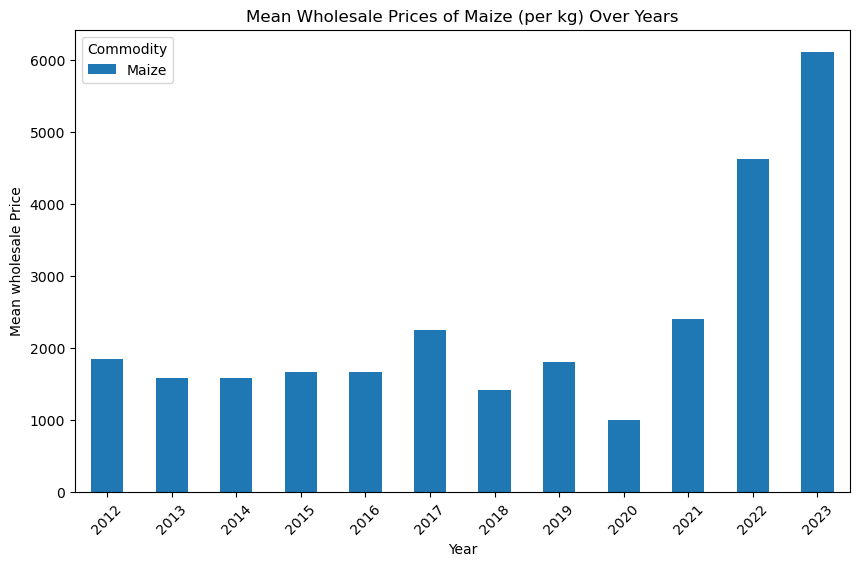

In [950]:
# Convert 'date' to datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%d/%m/%Y')

# Extract the year from the 'date' column
filtered_df['year'] = filtered_df['date'].dt.year
# Clean the 'price' column
filtered_df['price'] = pd.to_numeric(filtered_df['price'], errors='coerce')

# Select only Maize data and only wholesale prices
maize_data_wholesale = filtered_df[(filtered_df['commodity'] == 'Maize') & (filtered_df['pricetype'] == 'Wholesale')]

# Calculate mean prices for wholesale Maize and unstack the result
mean_prices_wholesale = maize_data_wholesale.groupby(['year', 'commodity'])['price'].mean().unstack()

# Bar plot for wholesale prices
mean_prices_wholesale.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Mean Wholesale Prices of Maize (per kg) Over Years')
plt.xlabel('Year')
plt.ylabel('Mean wholesale Price')
plt.xticks(rotation=45)
plt.legend(title='Commodity')
plt.show()


from the above we see a significant increase of wholesale prices of maize between 2021 - 2023 this can be assumed to be a shift in  economic factors, such as inflation rates, exchange rates, and general economic growth, which can impact commodity prices, including maize.

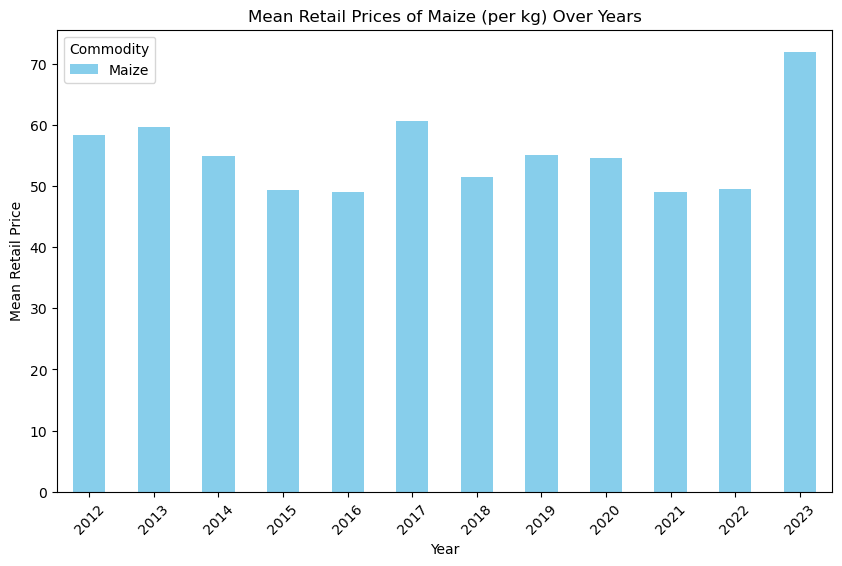

In [951]:
# Clean the 'price' column
filtered_df['price'] = pd.to_numeric(filtered_df['price'], errors='coerce')

# Select only Maize data and only retail prices
maize_data_retail = filtered_df[(filtered_df['commodity'] == 'Maize') & (filtered_df['pricetype'] == 'Retail')]

# Calculate mean retail prices for Maize and unstack the result
mean_prices_retail = maize_data_retail.groupby(['year', 'commodity'])['price'].mean().unstack()

# Bar plot for mean retail prices of Maize
mean_prices_retail.plot(kind='bar', stacked=True, figsize=(10, 6), color='skyblue')
plt.title('Mean Retail Prices of Maize (per kg) Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Retail Price')
plt.xticks(rotation=45)
plt.legend(title='Commodity')
plt.show()


 The mean retail price of maize shows a steady increase and decrease over the years but seems to rapidly increase in 2023 which could indicate a decrease in crop yield hence higher prices

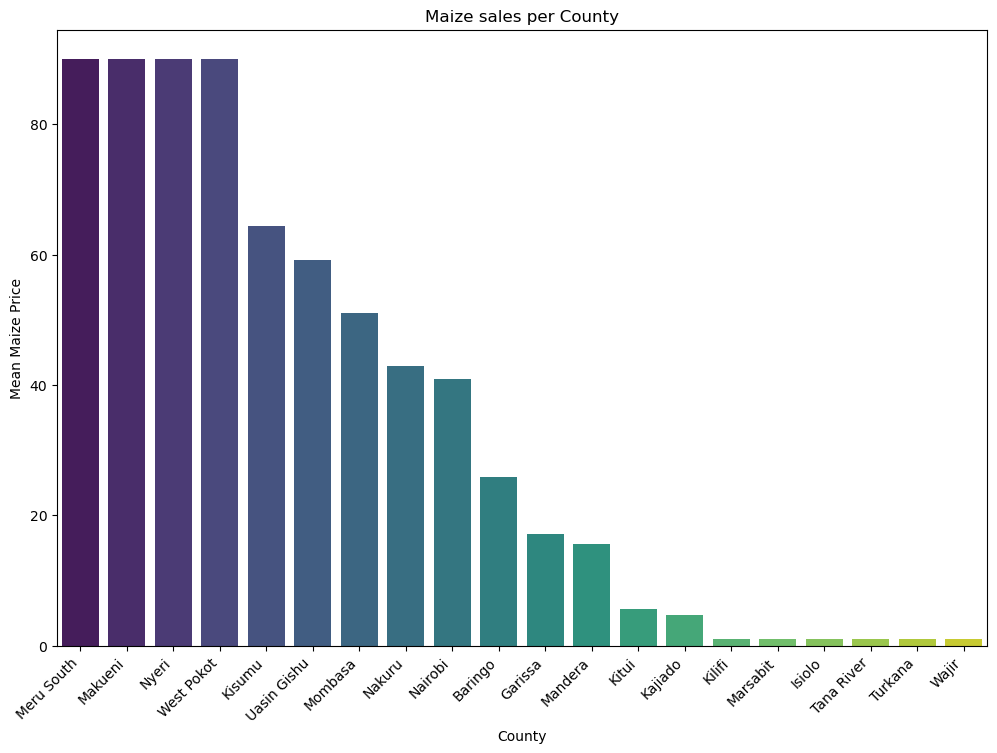

In [952]:
# Convert 'unit' to numeric values
filtered_df['unit'] = pd.to_numeric(filtered_df['unit'], errors='coerce')
# Filter data for maize and convert 'unit' to numeric values
maize_data = filtered_df[filtered_df['commodity'] == 'Maize']

# Group by 'admin2' (county) and calculate the mean of maize prices
mean_maize_prices_by_county = maize_data.groupby('admin2')['unit'].mean().reset_index()

# Sort the DataFrame by mean prices in descending order
mean_maize_prices_by_county = mean_maize_prices_by_county.sort_values(by='unit', ascending=False)

# Plot a bar plot to represent the top mean wholesale maize prices for each county
plt.figure(figsize=(12, 8))
sns.barplot(x='admin2', y='unit', data=mean_maize_prices_by_county, palette='viridis')
plt.title('Maize sales per County')
plt.xlabel('County')
plt.ylabel('Mean Maize Price')
plt.xticks(rotation=45, ha='right')
plt.show()

The above grapgh shows Meru,Makueni,Nyeri and West Pokot as the leading counties in maize production 

# Visualization of Beans prices over the Years 2012 -2023

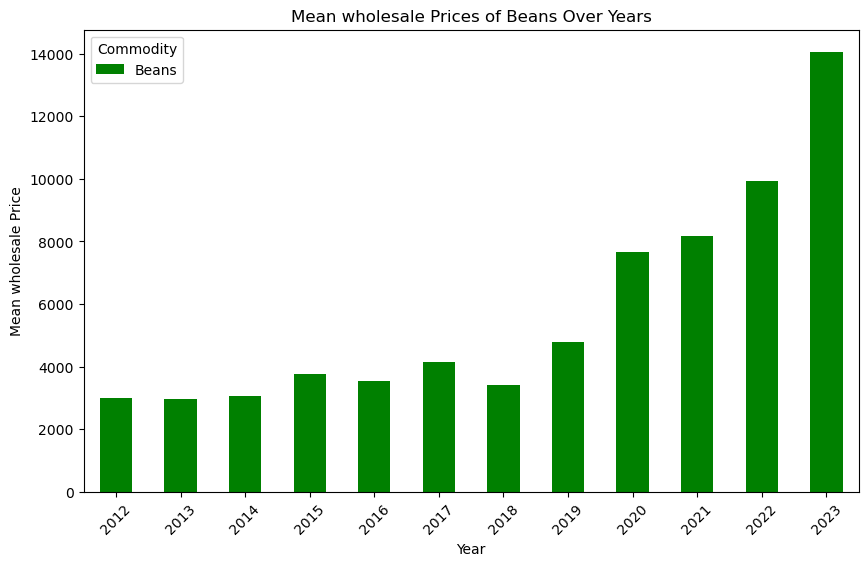

In [953]:
filtered_df = filtered_df.copy()

filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%d/%m/%Y')
filtered_df['year'] = filtered_df['date'].dt.year

# Select only Beans data
beans_data_wholesale = filtered_df[(filtered_df['commodity'] == 'Beans') & (filtered_df['pricetype'] == 'Wholesale')]

# Calculate mean prices for Beans and unstack the result
mean_prices_wholesale_beans = beans_data_wholesale.groupby(['year', 'commodity'])['price'].mean().unstack()

# Bar plot for Beans
mean_prices_wholesale_beans.plot(kind='bar', stacked=True, figsize=(10, 6), color='green')
plt.title('Mean wholesale Prices of Beans Over Years')
plt.xlabel('Year')
plt.ylabel('Mean wholesale Price')
plt.xticks(rotation=45)
plt.legend(title='Commodity')
plt.show()

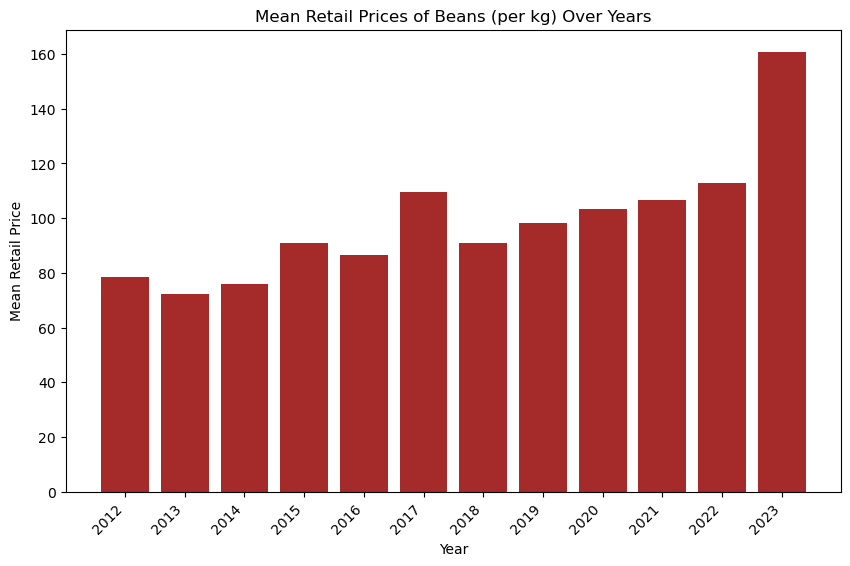

In [954]:
# Convert 'date' to datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%d/%m/%Y')

# Extract the year from the 'date' column
filtered_df['year'] = filtered_df['date'].dt.year
# Clean the 'price' column
filtered_df['price'] = pd.to_numeric(filtered_df['price'], errors='coerce')

# Select only Beans data and only retail prices
beans_data_retail = filtered_df[(filtered_df['commodity'] == 'Beans') & (filtered_df['pricetype'] == 'Retail')]

# Calculate mean prices for retail Beans and unstack the result
beans_mean_prices_retail = beans_data_retail.groupby('year')['price'].mean()

# Bar plot for retail prices of Beans
plt.figure(figsize=(10, 6))
plt.bar(beans_mean_prices_retail.index, beans_mean_prices_retail.values, color='brown')
plt.title('Mean Retail Prices of Beans (per kg) Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Retail Price')
plt.xticks(beans_mean_prices_retail.index, rotation=45, ha='right')  # Specify tick locations and rotation
plt.show()

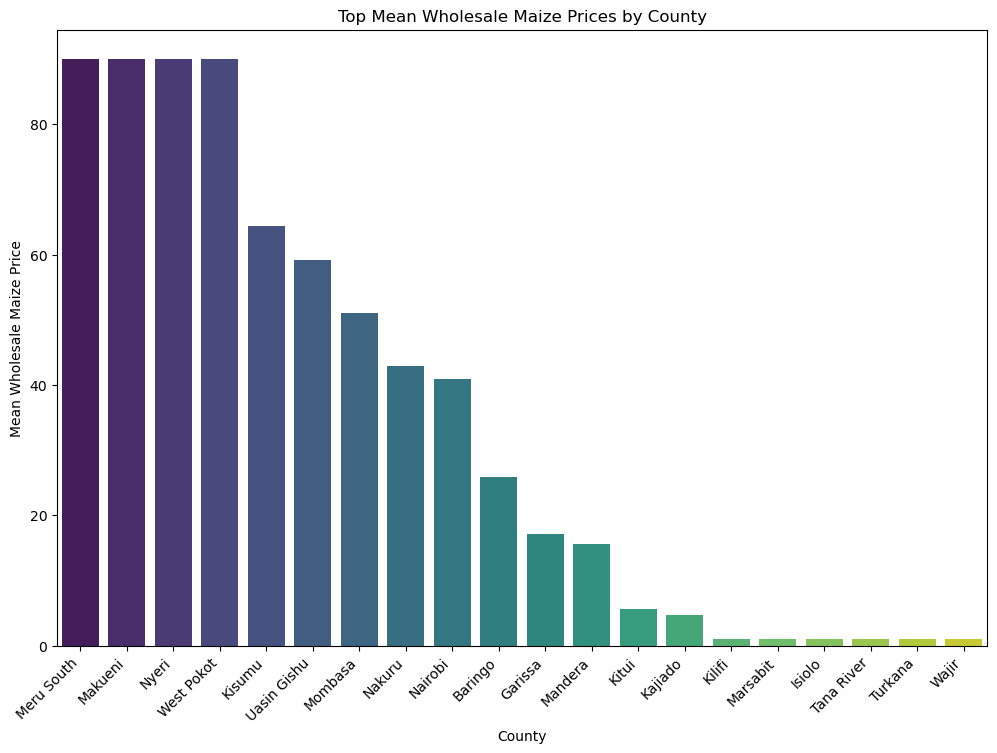

In [955]:
# Convert 'unit' to numeric values
filtered_df['unit'] = pd.to_numeric(filtered_df['unit'], errors='coerce')
# Filter data for maize and convert 'unit' to numeric values
maize_data = filtered_df[filtered_df['commodity'] == 'Maize']

# Group by 'admin2' (county) and calculate the mean of maize prices
mean_maize_prices_by_county = maize_data.groupby('admin2')['unit'].mean().reset_index()

# Sort the DataFrame by mean prices in descending order
mean_maize_prices_by_county = mean_maize_prices_by_county.sort_values(by='unit', ascending=False)

# Plot a bar plot to represent the top mean wholesale maize prices for each county
plt.figure(figsize=(12, 8))
sns.barplot(x='admin2', y='unit', data=mean_maize_prices_by_county, palette='viridis')
plt.title('Top Mean Wholesale Maize Prices by County')
plt.xlabel('County')
plt.ylabel('Mean Wholesale Maize Price')
plt.xticks(rotation=45, ha='right')
plt.show()


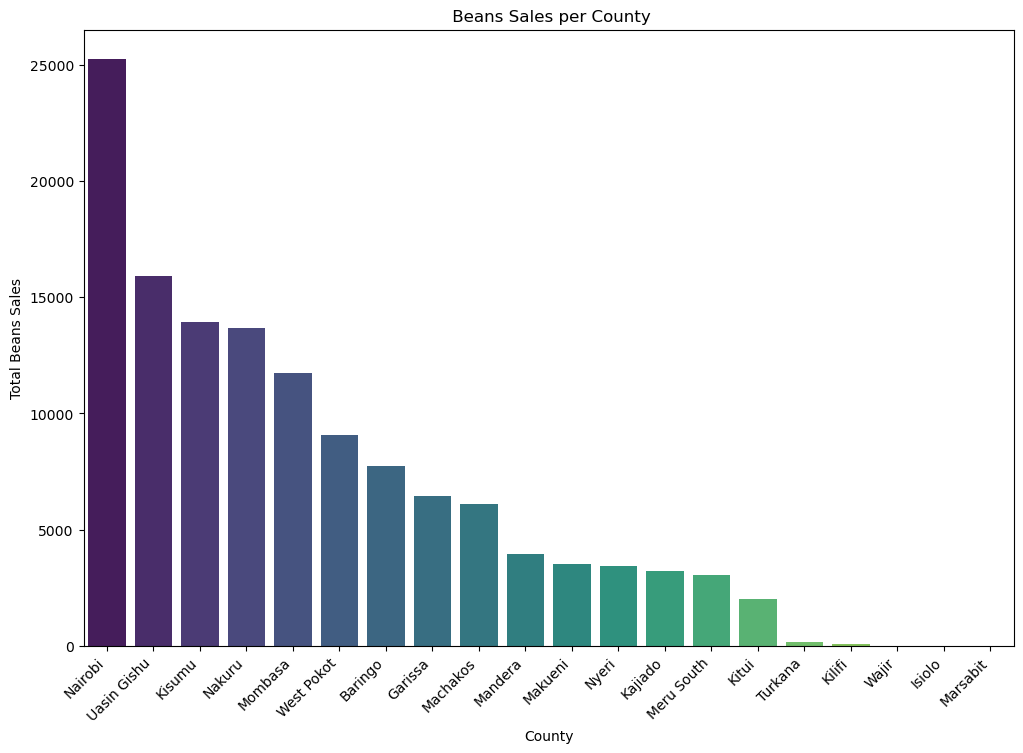

In [956]:
beans_data = filtered_df[filtered_df['commodity'] == 'Beans']

# Group by 'admin2' (county) and sum the quantities sold
total_beans_sales_by_county = beans_data.groupby('admin2')['unit'].sum().reset_index()

# Sort the DataFrame by total sales in descending order
total_beans_sales_by_county = total_beans_sales_by_county.sort_values(by='unit', ascending=False)

# Plot a bar plot to represent the counties with the most beans sales
plt.figure(figsize=(12, 8))
sns.barplot(x='admin2', y='unit', data=total_beans_sales_by_county, palette='viridis')
plt.title(' Beans Sales per County')
plt.xlabel('County')
plt.ylabel('Total Beans Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization of Bananas prices over the Years 2018 -2023

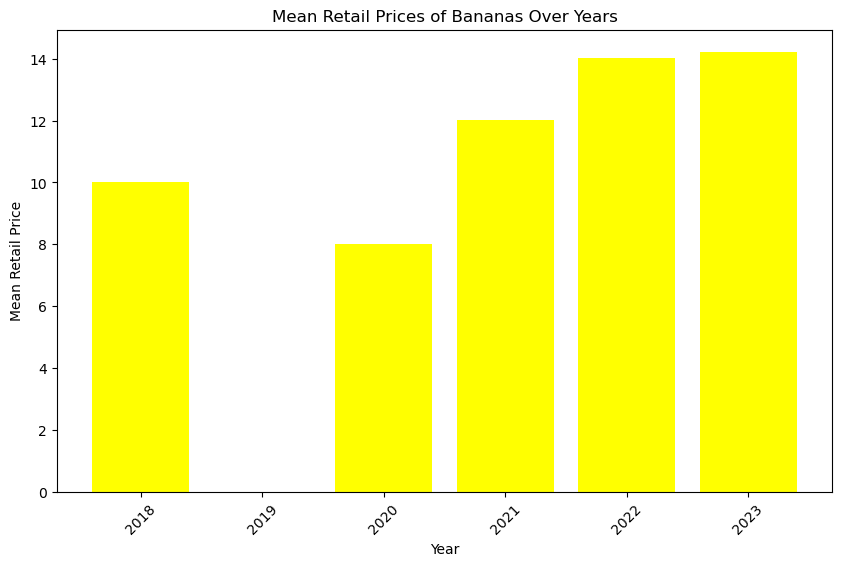

In [957]:
# Convert 'date' to datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%d/%m/%Y')

# Extract the year from the 'date' column
filtered_df['year'] = filtered_df['date'].dt.year
# Clean the 'price' column
filtered_df['price'] = pd.to_numeric(filtered_df['price'], errors='coerce')

# Select only Bananas data and only retail prices
bananas_data_retail = filtered_df[(filtered_df['commodity'] == 'Bananas') & (filtered_df['pricetype'] == 'Retail')]

# Calculate mean prices for retail Bananas
bananas_mean_prices_retail = bananas_data_retail.groupby('year')['price'].mean()

# Bar plot for retail prices of Bananas
plt.figure(figsize=(10, 6))
plt.bar(bananas_mean_prices_retail.index, bananas_mean_prices_retail.values, color='yellow')
plt.title('Mean Retail Prices of Bananas Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Retail Price')
plt.xticks(rotation=45)
plt.show()

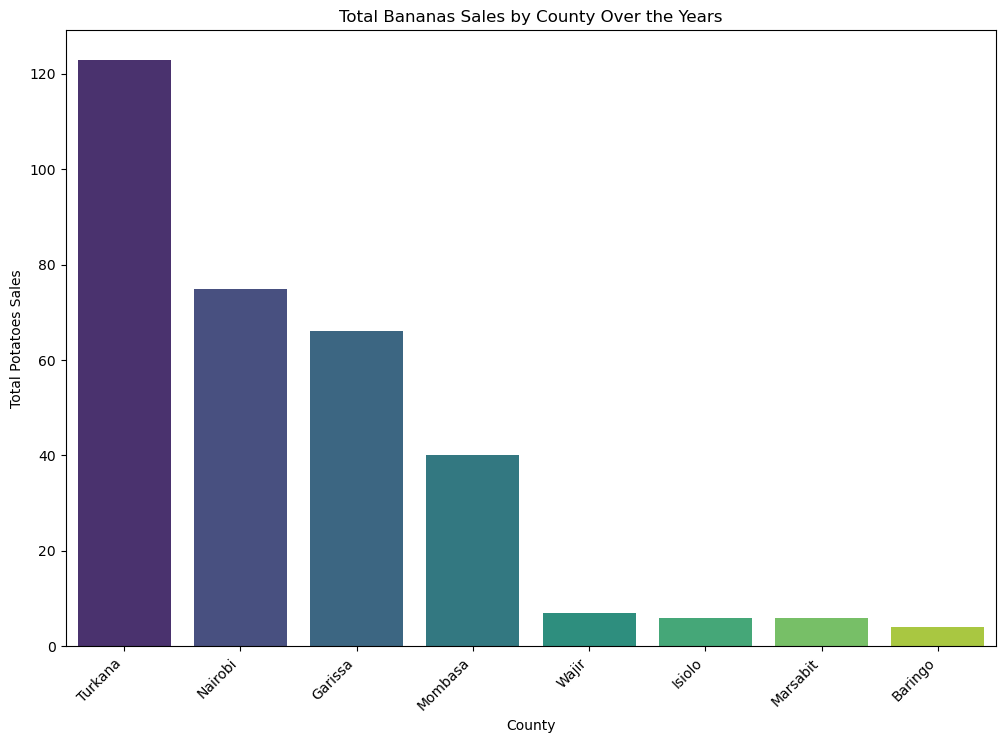

In [958]:
# Filter the DataFrame to include only rows where the 'commodity' is 'Potatoes'
bananas_data = filtered_df[filtered_df['commodity'] == 'Bananas']

# Group by 'admin2' (county) and sum the quantities sold
total_bananas_sales_by_county = bananas_data.groupby('admin2')['unit'].sum().reset_index()

# Sort the DataFrame by total sales in descending order
total_bananas_sales_by_county = total_bananas_sales_by_county.sort_values(by='unit', ascending=False)

# Plot a bar plot to represent the counties with the most potatoes sales
plt.figure(figsize=(12, 8))
sns.barplot(x='admin2', y='unit', data=total_bananas_sales_by_county, palette='viridis')
plt.title('Total Bananas Sales by County Over the Years')
plt.xlabel('County')
plt.ylabel('Total Potatoes Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization of Potatoes prices over the Years 2012 -2023

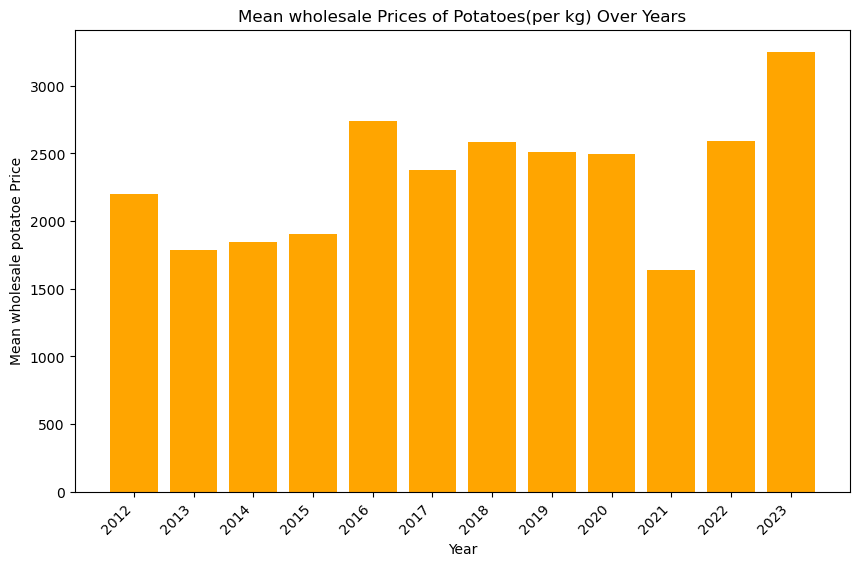

In [959]:
# Convert 'date' to datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%d/%m/%Y')

# Extract the year from the 'date' column
filtered_df['year'] = filtered_df['date'].dt.year
# Clean the 'price' column
filtered_df['price'] = pd.to_numeric(filtered_df['price'], errors='coerce')

# Select only Potatoes data and only retail prices
potatoes_data_wholesale = filtered_df[(filtered_df['commodity'] == 'Potatoes') & (filtered_df['pricetype'] == 'Wholesale')]

# Calculate mean prices for retail Potatoes
potatoes_mean_prices_wholesale = potatoes_data_wholesale.groupby('year')['price'].mean()

# Bar plot for retail prices of Potatoes
plt.figure(figsize=(10, 6))
plt.bar(potatoes_mean_prices_wholesale.index, potatoes_mean_prices_wholesale.values, color='orange')
plt.title('Mean wholesale Prices of Potatoes(per kg) Over Years')
plt.xlabel('Year')
plt.ylabel('Mean wholesale potatoe Price')
plt.xticks(potatoes_mean_prices_wholesale.index, rotation=45, ha='right')  # Specify tick locations and rotation
plt.show()

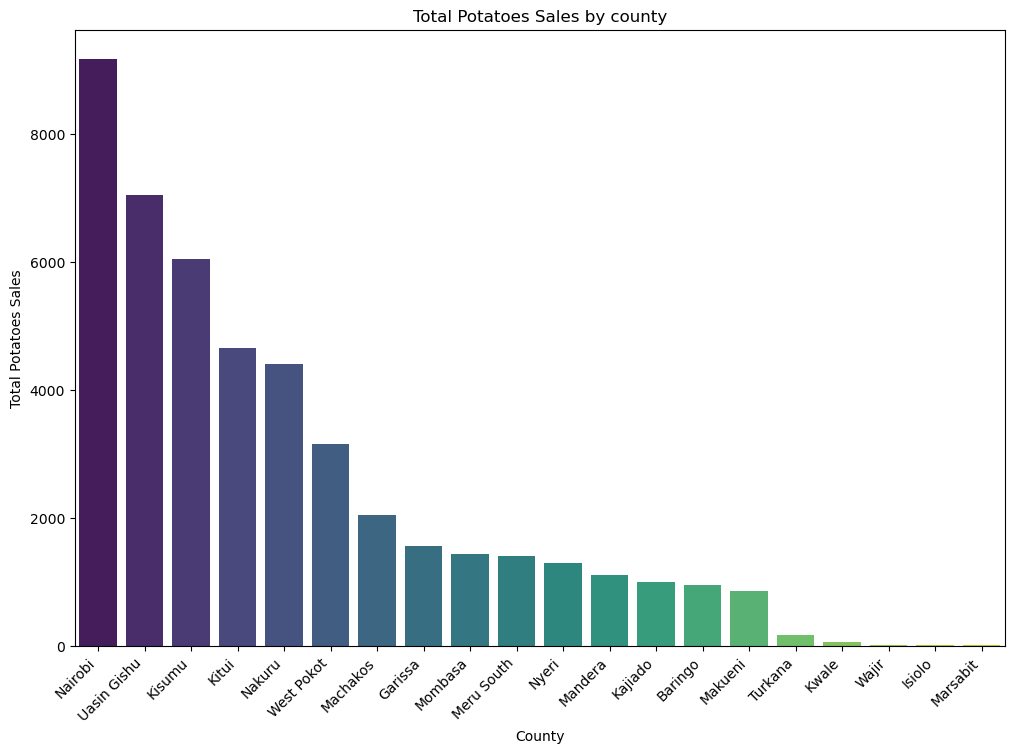

In [960]:
# Filter the DataFrame to include only rows where the 'commodity' is 'Potatoes'
potatoes_data = filtered_df[filtered_df['commodity'] == 'Potatoes']

# Group by 'admin2' (county) and sum the quantities sold
total_potatoes_sales_by_county = potatoes_data.groupby('admin2')['unit'].sum().reset_index()

# Sort the DataFrame by total sales in descending order
total_potatoes_sales_by_county = total_potatoes_sales_by_county.sort_values(by='unit', ascending=False)

# Plot a bar plot to represent the counties with the most potatoes sales
plt.figure(figsize=(12, 8))
sns.barplot(x='admin2', y='unit', data=total_potatoes_sales_by_county, palette='viridis')
plt.title('Total Potatoes Sales by county')
plt.xlabel('County')
plt.ylabel('Total Potatoes Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

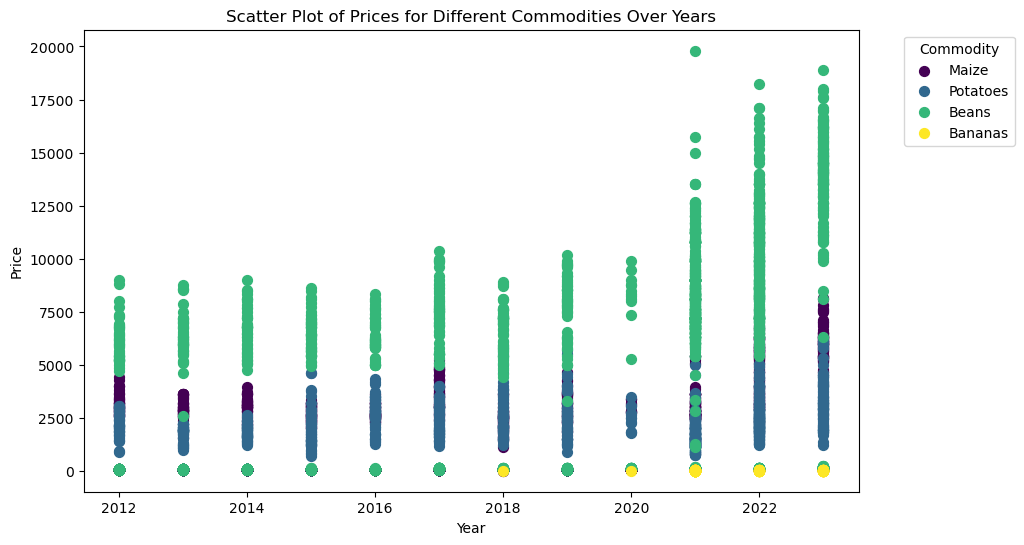

In [961]:
# Convert 'date' to datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%d/%m/%Y')

# Extract the year from the 'date' column
filtered_df['year'] = filtered_df['date'].dt.year
# Clean the 'price' column
filtered_df['price'] = pd.to_numeric(filtered_df['price'], errors='coerce')

# Select relevant data for scatter plot
scatter_data = filtered_df[(filtered_df['commodity'].isin(['Bananas', 'Maize', 'Beans', 'Potatoes']))]

# Create scatter plot
plt.figure(figsize=(10, 6))

commodities = scatter_data['commodity'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(commodities)))

for i, commodity in enumerate(commodities):
    commodity_data = scatter_data[scatter_data['commodity'] == commodity]
    plt.scatter(commodity_data['year'], commodity_data['price'], label=commodity, color=colors[i], s=50)

plt.title('Scatter Plot of Prices for Different Commodities Over Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

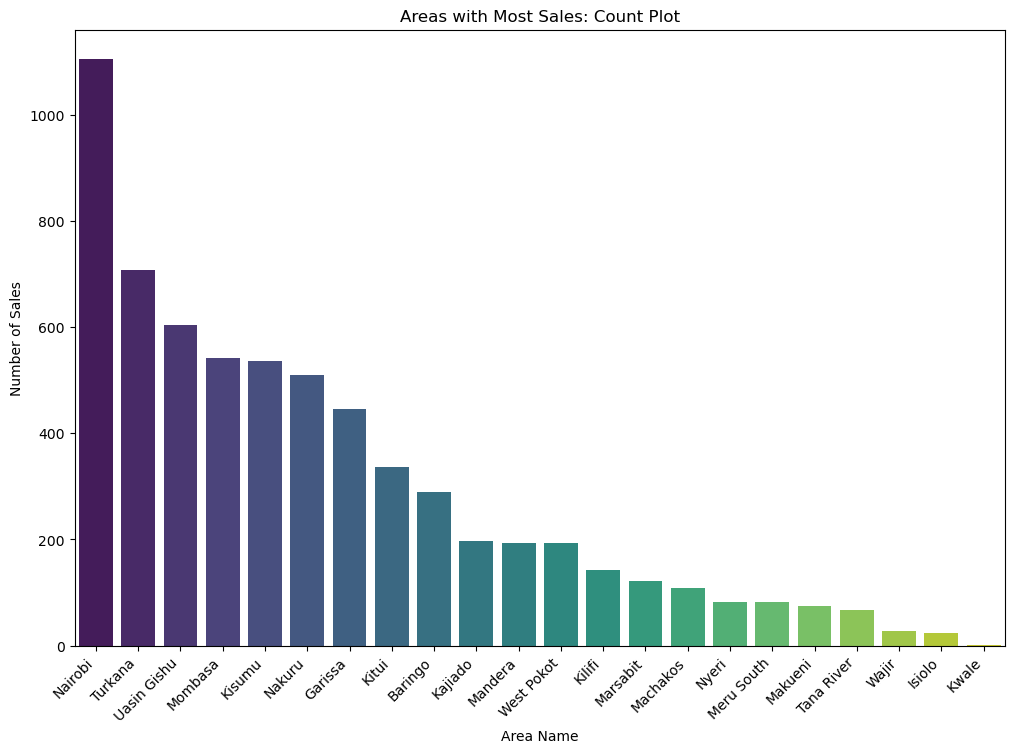

In [962]:
plt.figure(figsize=(12, 8))
sns.countplot(x='admin2', data=filtered_df, order=filtered_df['admin2'].value_counts().index, palette='viridis')
plt.title('Areas with Most Sales: Count Plot')
plt.xlabel('Area Name')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

In [963]:
stats_crops = filtered_df.groupby(['commodity', 'admin1'])['price'].describe()
stats_crops

count         mean          std      min        25%  \
commodity admin1                                                                
Bananas   Coast            40.0     9.993750     0.372942     8.41    10.0000   
          Eastern          12.0     7.916667     2.274696     5.00     5.7500   
          Nairobi          75.0     5.722133     1.469682     5.00     5.0000   
          North Eastern    73.0    10.436849     2.304245     5.00     9.8800   
          Rift Valley     127.0    18.744173     2.767870     5.00    19.5400   
Beans     Central          38.0  9062.289474  2869.611028  6003.00  7002.0000   
          Coast           311.0  2977.444309  3803.150601    41.95    86.2200   
          Eastern         282.0  4681.356950  4224.177096    60.00    81.0000   
          Nairobi         426.0  5771.276338  4759.274797    41.73   105.6050   
          North Eastern   190.0  6260.090632  5544.248745    88.75   126.7500   
          Nyanza          245.0  5610.755796  4582.066200    49.60    76.0400   
          Rift Valley    1046.0  4798.402256  4961.297267    44.96   100.9325   
Maize     Central          19.0  4273.105263  1588.160244  2601.00  2997.0000   
          Coast           333.0  1057.258168  1540.248232    20.23    40.0000   
          Eastern         263.0   661.385856  1505.557443    26.90    37.0000   
          Nairobi         348.0  1610.795086  1917.519256    22.17    35.9100   
          North Eastern   278.0   926.380827  2000.498331    45.00    60.0000   
          Nyanza          170.0  2729.349529  1935.651960    25.67    44.4575   
          Rift Valley     835.0  1138.465832  1741.306766    15.10    41.0000   
Potatoes  Central          26.0  1840.880769   513.343697   868.00  1422.0825   
          Coast            69.0   804.905652   975.922645    43.33    56.0000   
          Eastern         191.0  2193.278586  1075.433783    30.00  1591.6650   
          Nairobi         256.0  1602.770469  1137.195066    35.00    62.1250   
          North Eastern   125.0  1181.005680  1507.653777    42.97    56.5800   
          Nyanza          121.0  2423.501240   889.851026   800.00  1818.1800   
          Rift Valley     495.0  1547.429879  1335.841607    35.00    60.0000   

                              50%        75%       max  
commodity admin1                                        
Bananas   Coast            10.000     10.000     11.67  
          Eastern           8.500     10.000     10.00  
          Nairobi           5.000      5.605     10.00  
          North Eastern    10.000     10.000     18.75  
          Rift Valley      20.000     20.000     20.00  
Beans     Central        8001.000  10998.000  15498.00  
          Coast           107.300   5997.690  15300.00  
          Eastern        6750.000   7650.000  17100.00  
          Nairobi        6450.000   9000.000  17100.00  
          North Eastern  7424.000   9900.000  18900.00  
          Nyanza         6831.000   9600.000  14000.00  
          Rift Valley    5400.000   8499.000  19800.00  
Maize     Central        3352.500   6099.750   7002.00  
          Coast            52.500   2619.000   5895.00  
          Eastern          45.800     52.050   6750.00  
          Nairobi          50.000   3011.770   7571.00  
          North Eastern    66.000     80.000   7650.00  
          Nyanza         3200.000   3600.000   7833.00  
          Rift Valley      62.500   2501.000   8138.00  
Potatoes  Central        1813.165   2150.500   3090.83  
          Coast            70.000   1450.000   3193.33  
          Eastern        2125.000   2763.885   5700.00  
          Nairobi        1846.500   2454.000   5019.00  
          North Eastern    97.290   2250.000   6120.00  
          Nyanza         2170.550   2944.440   5000.00  
          Rift Valley    1514.000   2473.500   6126.67

Bananas
Coast Region: Bananas have a consistent mean retail price around 9.99 with low variability.
Eastern Region: The mean retail price is lower (7.92) compared to the Coast region, but there's higher variability.
Nairobi Region: The mean retail price is around 5.72, and there's moderate variability.
North Eastern Region: Bananas have a higher mean retail price of 10.44 with moderate variability.
Rift Valley Region: The mean retail price is 18.74 with relatively low variability.
Beans
Central Region: Beans have a high mean wholesale price (9062.29) with considerable variability.
Coast Region: The mean wholesale price is 2977.44, and there's a wide range of prices.
Eastern Region: Beans have a mean wholesale price of 4681.36 with significant variability.
Nairobi Region: The mean wholesale price is 5771.28, and there's considerable variability.
North Eastern Region: Beans have a mean wholesale price of 6260.09 with moderate variability.
Nyanza Region: The mean wholesale price is 5610.76 with moderate variability.
Rift Valley Region: The mean wholesale price is 4798.40 with high variability.
Maize
Central Region: Maize has a mean wholesale price of 4273.11 with moderate variability.
Coast Region: The mean wholesale price is 1057.26, and there's a wide range of prices.
Eastern Region: Maize has a mean wholesale price of 661.39 with high variability.
Nairobi Region: The mean wholesale price is 1610.80, and there's considerable variability.
North Eastern Region: Maize has a mean wholesale price of 926.38 with considerable variability.
Nyanza Region: The mean wholesale price is 2729.35 with moderate variability.
Rift Valley Region: The mean wholesale price is 1138.47 with high variability.
Potatoes
Central Region: Potatoes have a mean wholesale price of 1840.88 with moderate variability.
Coast Region: The mean wholesale price is 804.91, and there's a wide range of prices.
Eastern Region: Potatoes have a mean wholesale price of 2193.28 with high variability.
Nairobi Region: The mean wholesale price is 1602.77, and there's considerable variability.
North Eastern Region: Potatoes have a mean wholesale price of 1181.01 with moderate variability.
Nyanza Region: The mean wholesale price is 2423.50 with moderate variability.
Rift Valley Region: The mean wholesale price is 1547.43 with high variability.

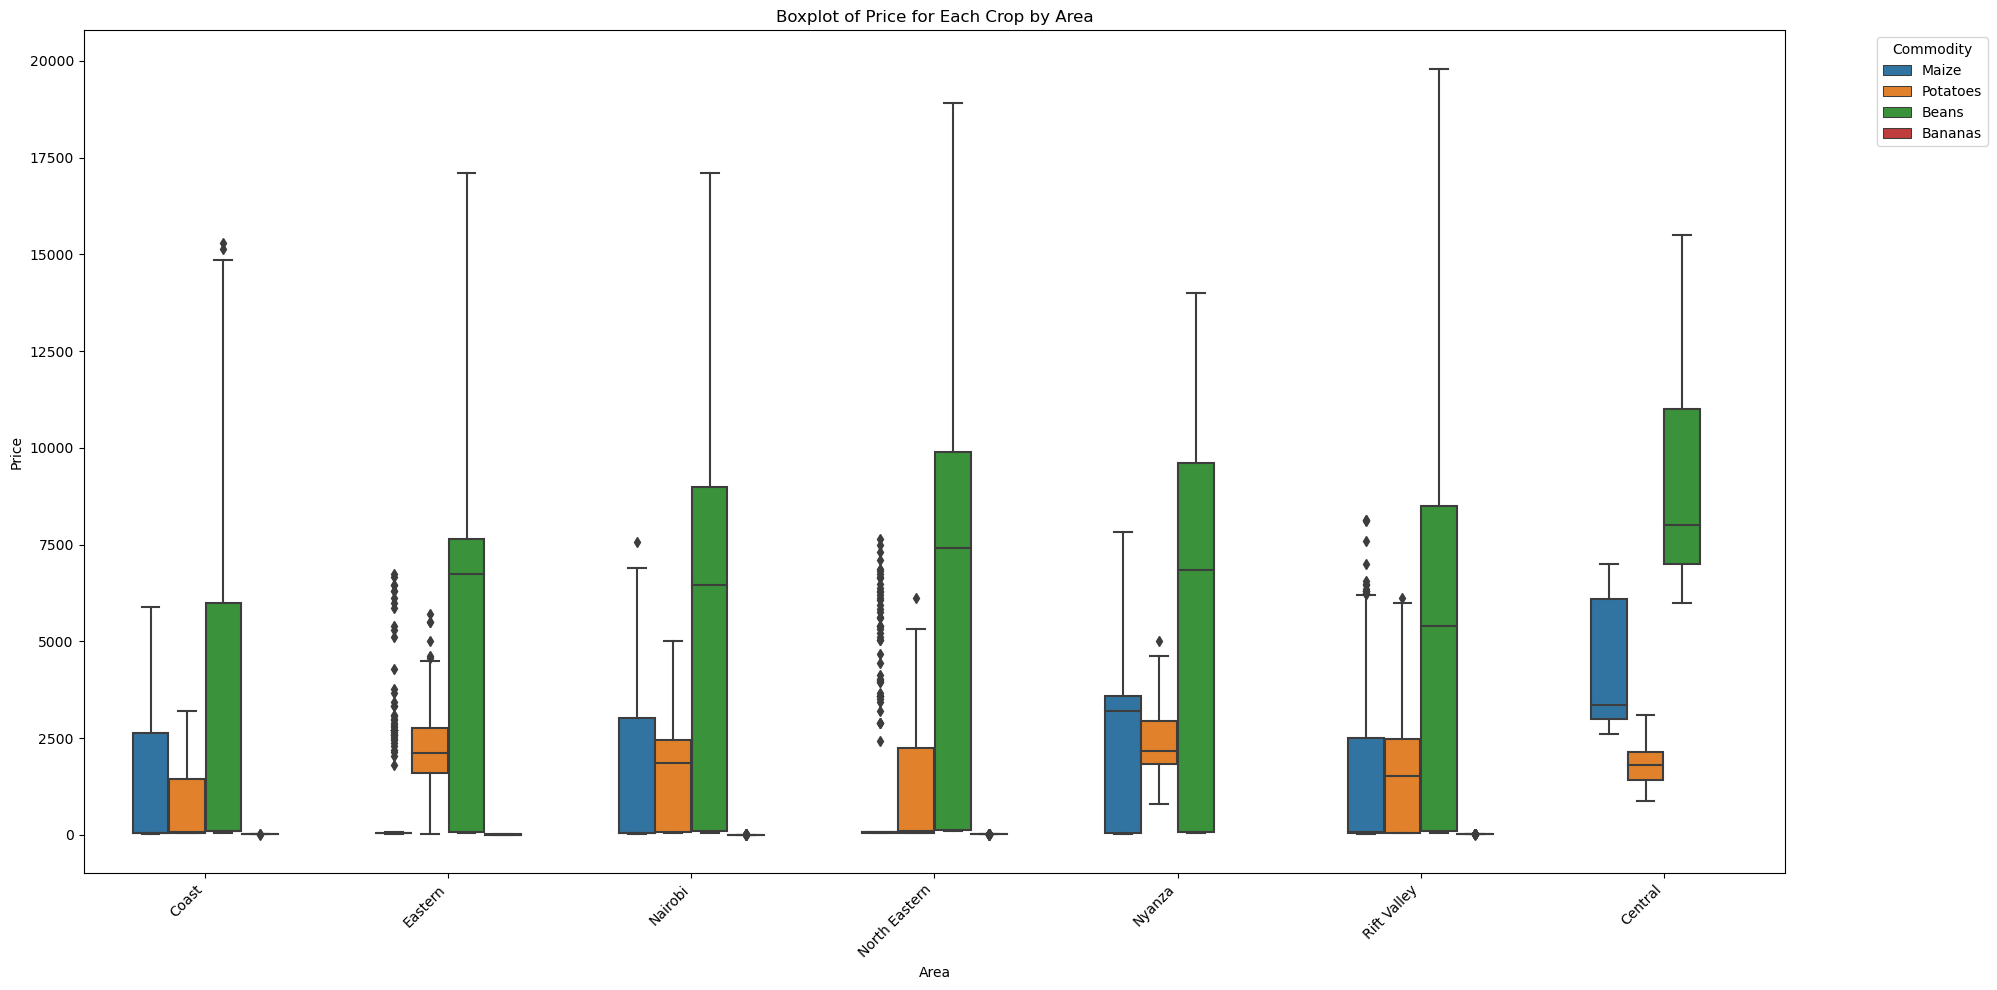

In [964]:
# Convert 'date' to datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%d/%m/%Y')

# Extract the year from the 'date' column
filtered_df['year'] = filtered_df['date'].dt.year
# Clean the 'price' column
filtered_df['price'] = pd.to_numeric(filtered_df['price'], errors='coerce')

# Set a larger figure size and adjust spacing
plt.figure(figsize=(20, 10))

# Set color palette with yellow for 'Bananas'
palette = {'Bananas': 'yellow', 'Maize': 'blue', 'Beans': 'green', 'Potatoes': 'red'}


# Create a boxplot
sns.boxplot(x='admin1', y='price', hue='commodity', data=filtered_df, width=0.6)
plt.title('Boxplot of Price for Each Crop by Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

From the above we can see that the most popular crop is beans followed by potatoes then maize and finally bananas. 

## Time series decomposition
Here we are performing time series decomposition for each crop in the dataset and visualize the original time series along with its trend, seasonal, and residual components. 

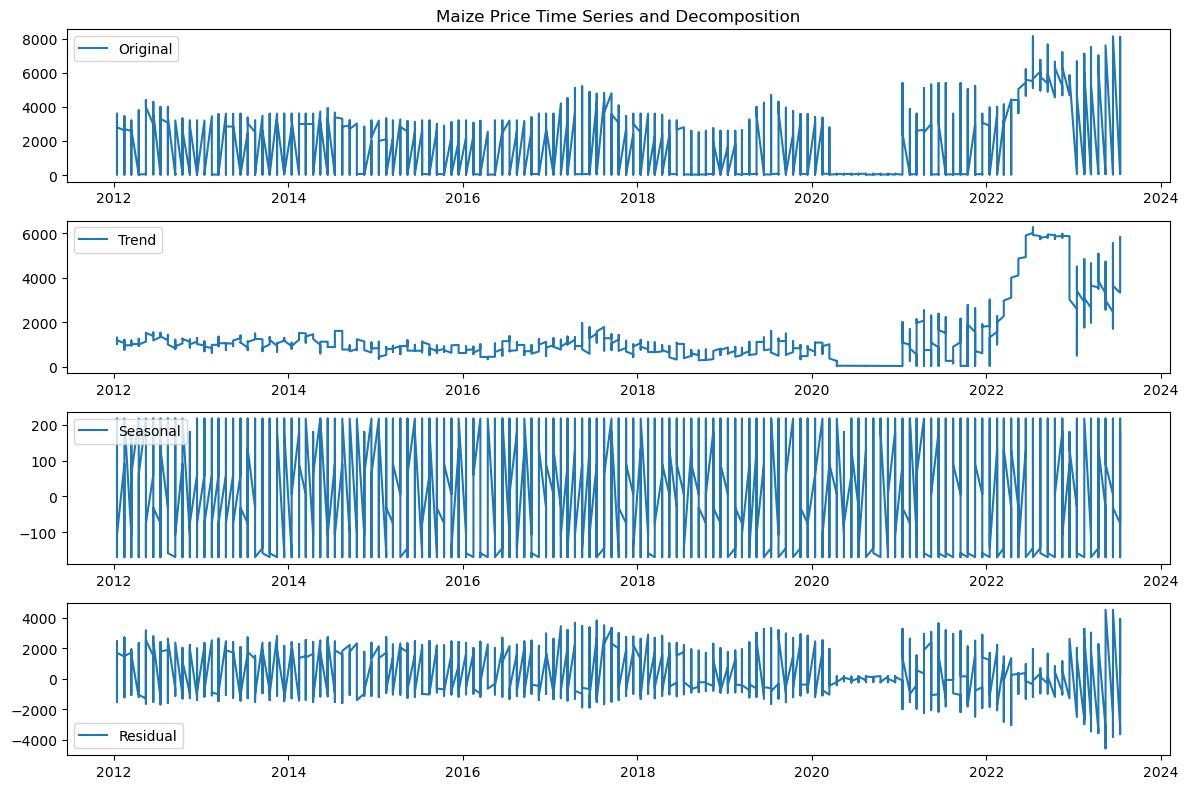

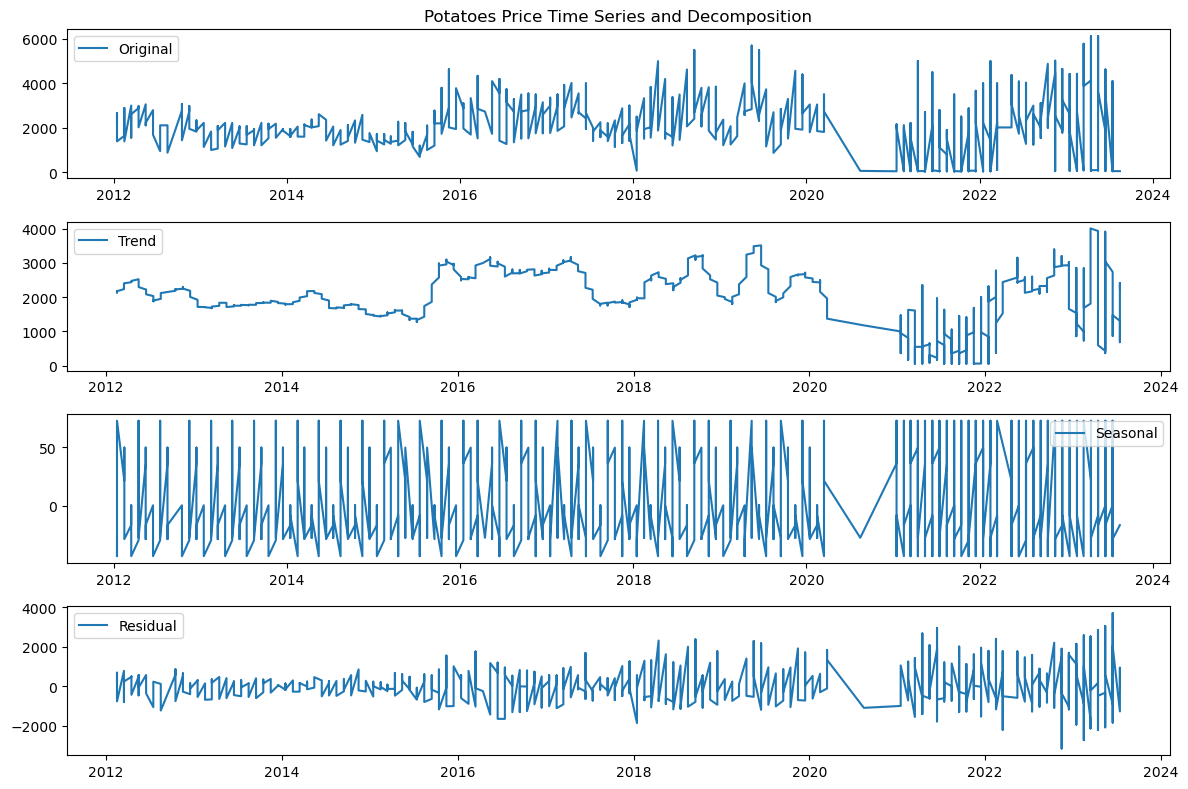

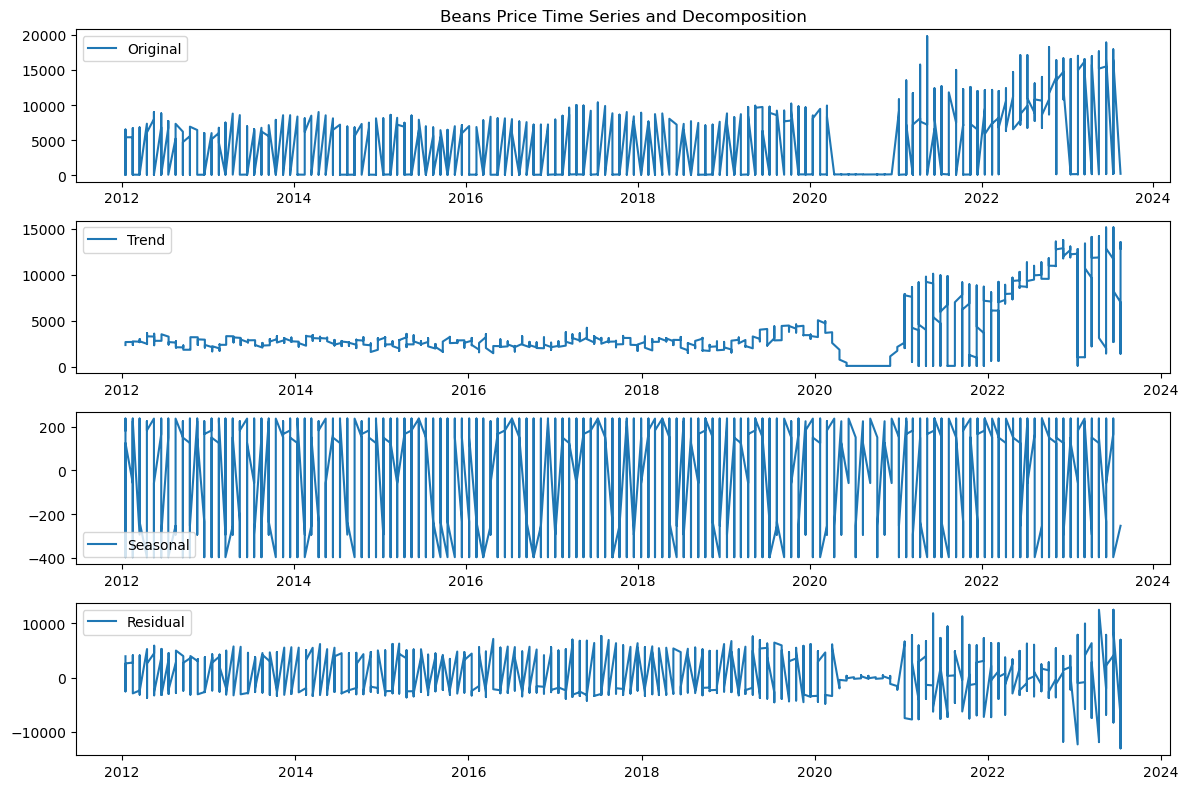

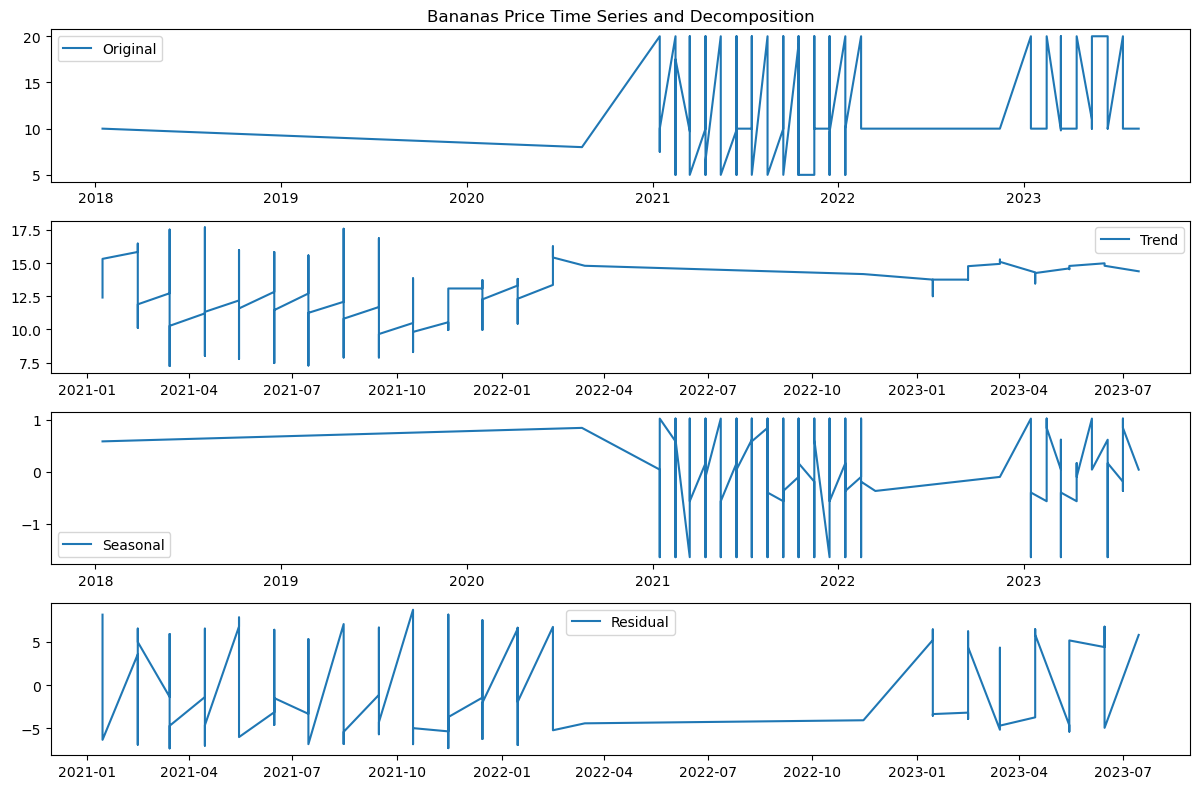

In [965]:
# Get unique crop names in the dataset
crop_names = filtered_df['commodity'].unique()

# Loop through each crop
for crop in crop_names:
    # Filter the dataset for the specific crop
    crop_data = filtered_df[filtered_df['commodity'] == crop].copy()
    
    # Convert 'date' column to datetime format
    crop_data['date'] = pd.to_datetime(crop_data['date'], format='%d/%m/%Y')
    
    # Ensure the DataFrame is sorted by date
    crop_data.sort_values(by='date', inplace=True)
    
    # Set 'date' as the index
    crop_data.set_index('date', inplace=True)
    
    # Perform time series decomposition
    decomposition = seasonal_decompose(crop_data['price'], model='additive', period=12)
    
    # Plot the decomposition components
    plt.figure(figsize=(12, 8))
    plt.subplot(4, 1, 1)
    plt.plot(crop_data['price'], label='Original')
    plt.legend()
    plt.title(f'{crop} Price Time Series and Decomposition')
    
    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend()
    
    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend()
    
    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

## Modelling

In [973]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6394 entries, 2012-01-15 to 2023-08-15
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   admin1         6394 non-null   object        
 1   admin2         6394 non-null   object        
 2   market         6394 non-null   object        
 3   longitude      6394 non-null   object        
 4   commodity      6394 non-null   object        
 5   unit           6394 non-null   int64         
 6   priceflag      6394 non-null   object        
 7   pricetype      6394 non-null   object        
 8   currency       6394 non-null   object        
 9   price          6394 non-null   float64       
 10  year           6394 non-null   int64         
 11  original_date  6394 non-null   datetime64[ns]
 12  log_price      6394 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 699.3+ KB


In [967]:
# Convert 'date' column to datetime format 
filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%d/%m/%Y')

# Create a new column with the same values as 'date'
filtered_df['original_date'] = filtered_df['date']

# Set 'date' as the index
filtered_df.set_index('date', inplace=True)

# Separate data into wholesale and retail subsets
# (Now you have both 'date' and 'original_date' columns in the DataFrame)
wholesale_data = filtered_df[filtered_df['pricetype'] == 'Wholesale']
retail_data = filtered_df[filtered_df['pricetype'] == 'Retail']

# Perform ADF test for wholesale prices
result_wholesale = adfuller(wholesale_data['price'], autolag='AIC')
print("ADF Test Results for Wholesale Prices:")
print(f'ADF Statistic: {result_wholesale[0]}')
print(f'p-value: {result_wholesale[1]}')
print(f'Critical Values: {result_wholesale[4]}')
print("Is the time stationary? ", result_wholesale[1] <= 0.05)

# Perform ADF test for retail prices
result_retail = adfuller(retail_data['price'], autolag='AIC')
print("\nADF Test Results for Retail Prices:")
print(f'ADF Statistic: {result_retail[0]}')
print(f'p-value: {result_retail[1]}')
print(f'Critical Values: {result_retail[4]}')
print("Is the time series stationary? ", result_retail[1] <= 0.05)

ADF Test Results for Wholesale Prices:
ADF Statistic: -2.241442169965415
p-value: 0.19154947930441318
Critical Values: {'1%': -3.432035633521567, '5%': -2.862284820538861, '10%': -2.567166476969625}
Is the time stationary?  False



ADF Test Results for Retail Prices:
ADF Statistic: -1.0588656438622164
p-value: 0.7311940952480911
Critical Values: {'1%': -3.433016456478213, '5%': -2.8627180168175133, '10%': -2.567397105578623}
Is the time series stationary?  False


The results of the Augmented Dickey-Fuller (ADF) test for both wholesale and retail prices indicate that the time series are not likely to be stationary. This conclusion is based on the p-values being greater than the significance level of 0.05. In this case, the p-values for both wholesale and retail prices are greater than the common significance level of 0.05. This suggests that we fail to reject the null hypothesis, which means that there is not enough evidence to claim that the time series is stationary.

# Doing log transformation to attempt to make the time series stationary

Creating  a new column 'log_price' for log-transformed prices in our dataset. Additionally, we've separated the data into wholesale and retail categories based on the 'pricetype' column and applied the log transformation to the respective price columns.

In [968]:
# Create a new column 'log_price' for log-transformed prices
filtered_df['log_price'] = np.log(filtered_df['price'])

# Separate data into wholesale and retail based on 'pricetype'
wholesale_data = filtered_df[filtered_df['pricetype'] == 'Wholesale'].copy()
retail_data = filtered_df[filtered_df['pricetype'] == 'Retail'].copy()

# Apply log transformation separately for wholesale and retail
wholesale_data['log_price'] = np.log(wholesale_data['price'])
retail_data['log_price'] = np.log(retail_data['price'])


In [969]:
#Doing ADF on the log transformed data 
result_wholesale = adfuller(wholesale_data['log_price'].dropna(), autolag='AIC')
print(f'ADF Statistic for Wholesale Log Prices: {result_wholesale[0]}')
print(f'p-value for Wholesale Log Prices: {result_wholesale[1]}')

# ADF test for retail log prices
result_retail = adfuller(retail_data['log_price'].dropna(), autolag='AIC')
print(f'ADF Statistic for Retail Log Prices: {result_retail[0]}')
print(f'p-value for Retail Log Prices: {result_retail[1]}')

# Check stationarity
if result_wholesale[1] <= 0.05:
    print("The log-transformed wholesale prices are likely stationary.")
else:
    print("The log-transformed wholesale prices are likely non-stationary.")

if result_retail[1] <= 0.05:
    print("The log-transformed retail prices are likely stationary.")
else:
    print("The log-transformed retail prices are likely non-stationary.")

ADF Statistic for Wholesale Log Prices: -2.5605551846608283
p-value for Wholesale Log Prices: 0.10142678697157487
ADF Statistic for Retail Log Prices: -3.1489474646951767
p-value for Retail Log Prices: 0.023136601565645978
The log-transformed wholesale prices are likely non-stationary.
The log-transformed retail prices are likely stationary.


from the ADF above we can see that the log transformation managed to make the retail prices stationary. However though reduced,the wholesale prices seem to be still non-stationary

In [970]:
wholesale_data['diff_log_price'] = wholesale_data['log_price'].diff()

# ADF test for differenced log-transformed wholesale prices
result_diff_wholesale = adfuller(wholesale_data['diff_log_price'].dropna(), autolag='AIC')

# Print ADF test results for differenced log-transformed wholesale prices
print(f'ADF Statistic for Differenced Log Prices (Wholesale): {result_diff_wholesale[0]}')
print(f'p-value for Differenced Log Prices (Wholesale): {result_diff_wholesale[1]}')

# Check stationarity
if result_diff_wholesale[1] <= 0.05:
    print("The differenced log-transformed wholesale prices are likely stationary.")
else:
    print("The differenced log-transformed wholesale prices are likely non-stationary.")

ADF Statistic for Differenced Log Prices (Wholesale): -18.533848328946867
p-value for Differenced Log Prices (Wholesale): 2.1015384967849748e-30
The differenced log-transformed wholesale prices are likely stationary.


The p-value 2.1015384967849748e-30 obtained from the ADF test for differenced log-transformed wholesale prices is extremely close to zero. In statistical hypothesis testing, a p-value below the common significance level of 0.05 suggests strong evidence against the null hypothesis of non-stationarity. By differencing the wholesale prices we have achieved stationarity

In [971]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6394 entries, 2012-01-15 to 2023-08-15
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   admin1         6394 non-null   object        
 1   admin2         6394 non-null   object        
 2   market         6394 non-null   object        
 3   longitude      6394 non-null   object        
 4   commodity      6394 non-null   object        
 5   unit           6394 non-null   int64         
 6   priceflag      6394 non-null   object        
 7   pricetype      6394 non-null   object        
 8   currency       6394 non-null   object        
 9   price          6394 non-null   float64       
 10  year           6394 non-null   int64         
 11  original_date  6394 non-null   datetime64[ns]
 12  log_price      6394 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 699.3+ KB


## Scaling data

In [ ]:
# Features to scale (excluding 'date' column)
features_to_scale = ['log_price', 'diff_log_price']

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform on the training set
wholesale_train_scaled = scaler.fit_transform(wholesale_train[features_to_scale])
wholesale_validation_scaled = scaler.transform(wholesale_validation[features_to_scale])
wholesale_test_scaled = scaler.transform(wholesale_test[features_to_scale])

# Repeat the process for retail data 
retail_train_scaled = scaler.fit_transform(retail_train[features_to_scale])
retail_validation_scaled = scaler.transform(retail_validation[features_to_scale])
retail_test_scaled = scaler.transform(retail_test[features_to_scale])

In [ ]:
# Check for missing values in X
missing_values_X = X.isnull().sum()
print("Missing values in X:")
print(missing_values_X)

# Check for missing values in y
missing_values_y = y.isnull().sum()
print("\nMissing values in y:")
print(missing_values_y)

Missing values in X:
unit     0
price    0
year     0
dtype: int64

Missing values in y:
0


In [ ]:
y.fillna(y.mean(), inplace=True)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6394 entries, 2012-01-15 to 2023-08-15
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   admin1     6394 non-null   object 
 1   admin2     6394 non-null   object 
 2   market     6394 non-null   object 
 3   longitude  6394 non-null   object 
 4   commodity  6394 non-null   object 
 5   unit       6394 non-null   int64  
 6   priceflag  6394 non-null   object 
 7   pricetype  6394 non-null   object 
 8   currency   6394 non-null   object 
 9   price      6394 non-null   float64
 10  year       6394 non-null   int64  
 11  log_price  6394 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 649.4+ KB


In [ ]:
if 'date' in df.columns:
    # Transfer 'date' column to filtered_df
    filtered_df['date'] = df['date']

    # Convert the 'date' column to datetime and set it as the index
    filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%d/%m/%Y', errors='coerce')
    filtered_df.set_index('date', inplace=True)
else:
    print("The 'date' column does not exist in df.")

# Simple Linear Regression Baseline model

In [982]:
# Features and target variable
features = ['unit', 'price', 'year']
target_variable = 'log_price'

X = filtered_df[features]
y = filtered_df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predict on the test set
predictions = baseline_model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Print the evaluation metric
print("Mean Absolute Error (MAE) of Baseline Model:", mae)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Print or display the DataFrame
print(comparison_df)



Mean Absolute Error (MAE) of Baseline Model: 0.4903878760836374
              Actual  Predicted
date                           
2022-01-15  4.756689   4.092938
2021-03-15  4.254335   4.082692
2023-05-15  8.748305   8.917656
2021-12-15  7.982758   8.573866
2012-06-15  3.645711   4.028099
...              ...        ...
2022-10-15  9.397525   9.479867
2021-09-15  9.061260   9.134542
2017-01-15  4.079908   4.058724
2014-07-15  7.454124   6.523467
2016-12-15  3.761200   4.051418

[1279 rows x 2 columns]


## ARIMA

In [985]:
time_series_data = filtered_df['log_price']

# Split the data into training and testing sets
train_size = int(len(time_series_data) * 0.8)
train, test = time_series_data[0:train_size], time_series_data[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 2))  # Adjust the order based on your data
fit_model = model.fit()

# Make predictions
predictions = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Evaluate the model
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

c:\Users\six\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\six\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\six\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\six\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\six\anaconda3\lib\site-packages\s

Mean Squared Error: 0.8308244404956002


c:\Users\six\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# SARIMA Model

In [976]:
features = ['unit', 'price', 'year']
target_variable = 'log_price'

# Extract relevant columns
df = filtered_df[['original_date'] + features + [target_variable]]


# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Train a SARIMA model
order = (1, 1, 1)  # Specify non-seasonal order
seasonal_order = (1, 1, 1, 12)  # Specify seasonal order (adjust as needed)

sarima_model = SARIMAX(train[target_variable], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

# Forecast using the trained model
forecast = sarima_fit.get_forecast(steps=len(test))

# Extract predicted values
predictions = forecast.predicted_mean

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(test[target_variable], predictions)

# Print the evaluation metric
print("Mean Absolute Error (MAE) of SARIMA Model:", mae)

c:\Users\six\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\six\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\six\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\six\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE) of SARIMA Model: 0.826305808360926


c:\Users\six\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
